# Task 4
# by Siraeva Gulnara, 1st year master’s student of Big Data and Machine Learning group (J4132) ITMO

1.	Fill all the necessary gaps in CNN_and_Transfer_Learning.ipynb and fit neural networks for solving the binary classification task.

# Dataset
Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

In [2]:
!pip install tensorflow
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 3.8 MB/s eta 0:01:42
   ---------------------------------------- 0.2/390.2 MB 2.5 MB/s eta 0:02:37
   ---------------------------------------- 0.3/390.2 MB 2.5 MB/s eta 0:02:39
   ---------------------------------------- 0.7/390.2 MB 4.2 MB/s eta 0:01:34
   ---------------------------------------- 1.2/390.2 MB 5.2 MB/s eta 0:01:15
   ---------------------------------------- 1.9/390.2 MB 6.6 MB/s eta 0:00:59
   ---------------------------------------- 2.5/390.2 MB 7.6 MB/s eta 0:00:52
   ---------------------------------------- 3.1/390.2 MB 8.3 MB/s eta 0:00:47
   ---------------------------------------- 3.6/390.2 MB 8.9 MB/s eta 0:0


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports

In [ ]:
# lets import all needed imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import missingno as msno
import time
import math
from matplotlib import pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# for ml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn import datasets, metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn import svm
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, Xception, ResNet50
# from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image

# мfor metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss, classification_report


# for system
import os
import sys
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Part 1

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)


In [5]:
# Function to load and preprocess images from a directory
def load_and_preprocess_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        img = Image.open(file_path).resize((128, 128))
        images.append(np.array(img) / 255.0) 
        labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Paths to image directories
train_cats_path = "C:/Users/pasle/Desktop/HW/MLT/T4/train/cats"
train_dogs_path = "C:/Users/pasle/Desktop/HW/MLT/T4/train/dogs"
val_cats_path = "C:/Users/pasle/Desktop/HW/MLT/T4/val/cats"
val_dogs_path = "C:/Users/pasle/Desktop/HW/MLT/T4/val/dogs"
test_cats_path = "C:/Users/pasle/Desktop/HW/MLT/T4/test/cats"
test_dogs_path = "C:/Users/pasle/Desktop/HW/MLT/T4/test/dogs"

In [10]:
# Load training images
X_train_cats, y_train_cats = load_and_preprocess_images(train_cats_path, label=0)
X_train_dogs, y_train_dogs = load_and_preprocess_images(train_dogs_path, label=1)
X_train = np.concatenate([X_train_cats, X_train_dogs], axis=0)
y_train = np.concatenate([y_train_cats, y_train_dogs], axis=0)

# Load validation images
X_val_cats, y_val_cats = load_and_preprocess_images(val_cats_path, label=0)
X_val_dogs, y_val_dogs = load_and_preprocess_images(val_dogs_path, label=1)
X_val = np.concatenate([X_val_cats, X_val_dogs], axis=0)
y_val = np.concatenate([y_val_cats, y_val_dogs], axis=0)

# Load test images
X_test_cats, y_test_cats = load_and_preprocess_images(test_cats_path, label=0)
X_test_dogs, y_test_dogs = load_and_preprocess_images(test_dogs_path, label=1)
X_test = np.concatenate([X_test_cats, X_test_dogs], axis=0)
y_test = np.concatenate([y_test_cats, y_test_dogs], axis=0)

In [ ]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\pasle\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1307s 2s/step - accuracy: 0.5963 - loss: 0.6862 - val_accuracy: 0.7349 - val_loss: 0.5376
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 148ms/step - accuracy: 0.7453 - loss: 0.5139 - val_accuracy: 0.7807 - val_loss: 0.4773
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.8061 - loss: 0.4234 - val_accuracy: 0.8100 - val_loss: 0.4374
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.8318 - loss: 0.3730 - val_accuracy: 0.8112 - val_loss: 0.4078
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 137ms/step - accuracy: 0.8710 - loss: 0.3037 - val_accuracy: 0.8390 - val_loss: 0.3780
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.8945 - loss: 0.2484 - val_accuracy: 0.8281 - val_loss: 0.4111
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 140ms/step - accuracy: 0.9284 - loss: 0.1787 - val_accuracy: 0.8241 - val_loss: 0.4217
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.9514 - loss: 0.

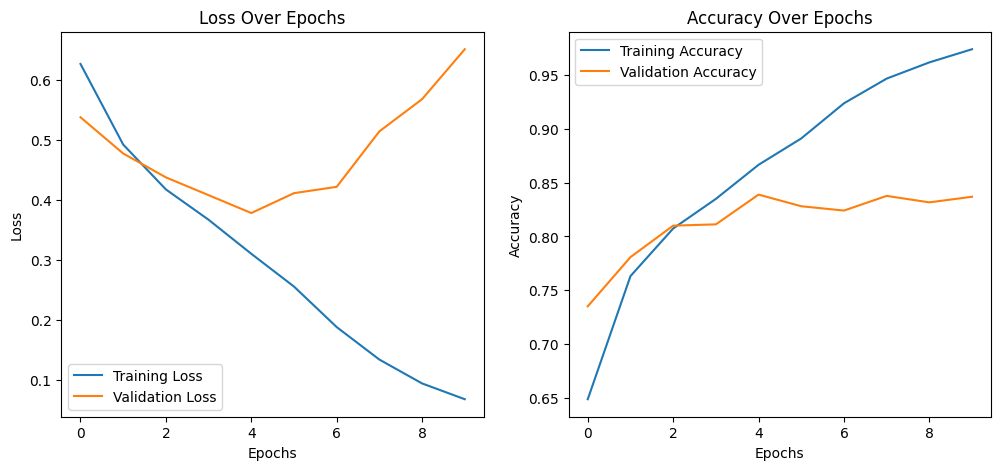

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

# Part 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with one more avaliable pre-trained deep learning model from keras application, for example Xception - https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [ ]:
# Model using Transfer Learning
def build_transfer_model(base_model):
    base_model.trainable = False  
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [21]:
# Load pre-trained VGG16 model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
vgg16_model = build_transfer_model(vgg16_base)

# Train VGG16 model
history_vgg16 = vgg16_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Load pre-trained Xception model
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
xception_model = build_transfer_model(xception_base)

# Train Xception model
history_xception = xception_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate both models on the test data
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(X_test, y_test)
xception_loss, xception_accuracy = xception_model.evaluate(X_test, y_test)

print(f"VGG16 Test Accuracy: {vgg16_accuracy}")
print(f"Xception Test Accuracy: {xception_accuracy}")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1571s 3s/step - accuracy: 0.8120 - loss: 0.4195 - val_accuracy: 0.8675 - val_loss: 0.2910
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 410s 656ms/step - accuracy: 0.8816 - loss: 0.2672 - val_accuracy: 0.8984 - val_loss: 0.2401
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 400s 639ms/step - accuracy: 0.9028 - loss: 0.2313 - val_accuracy: 0.8663 - val_loss: 0.3044
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 407s 652ms/step - accuracy: 0.9066 - loss: 0.2222 - val_accuracy: 0.8956 - val_loss: 0.2451
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 400s 640ms/step - accuracy: 0.9144 - loss: 0.1987 - val_accuracy: 0.9060 - val_loss: 0.2323
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 400s 640ms/step - accuracy: 0.9235 - loss: 0.1836 - val_accuracy: 0.9036 - val_loss: 0.2395
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 395s 632ms/step - accuracy: 0.9305 - loss: 0.1724 - val_accuracy: 0.9096 - val_loss: 0.2369
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 395s 633ms/step - accuracy: 0.9326 - l

In [22]:
# Plot Loss and Accuracy graphs for both models
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy Over Epochs')
    plt.legend()

    plt.show()

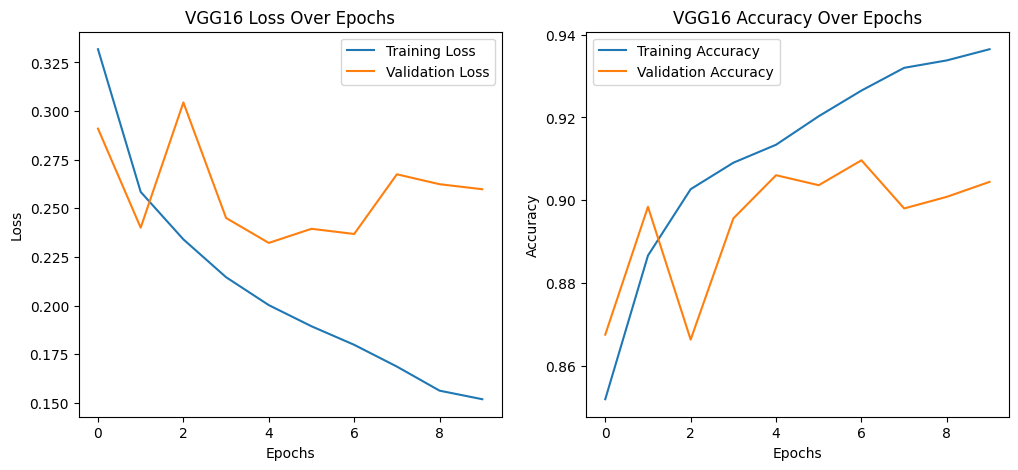

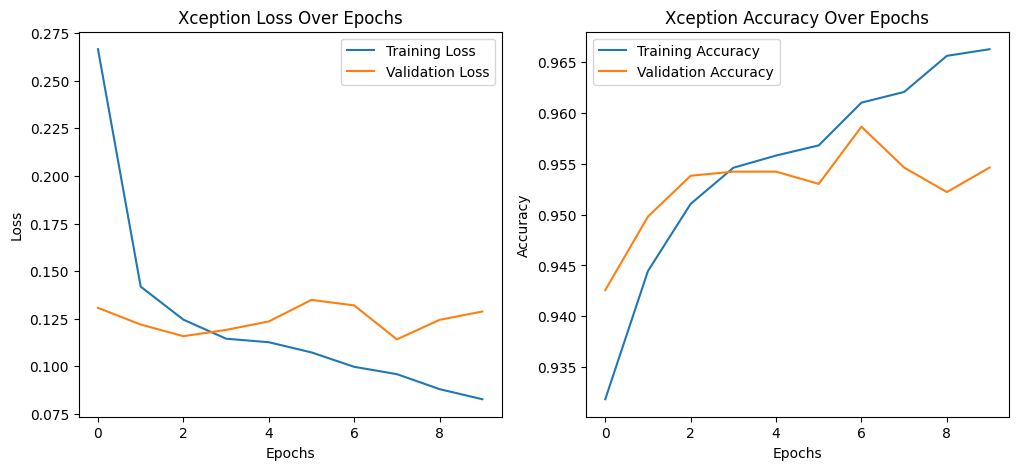

In [23]:
# Plot the training and validation loss and accuracy for VGG16
plot_history(history_vgg16, "VGG16")

# Plot the training and validation loss and accuracy for Xception
plot_history(history_xception, "Xception")

# Part 3

Train your own classificator with the highest possible accuracy on the test data. You can use any architecture/preprocessing/postprocessing/ensembling approach you want.

In [ ]:
# Build and compile models using Transfer Learning
def build_model(base_model):
    base_model.trainable = True  
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize pre-trained models
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vgg16_model = build_model(vgg16_base)
xception_model = build_model(xception_base)
resnet50_model = build_model(resnet50_base)

# Train models
history_vgg16 = vgg16_model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])
history_xception = xception_model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])
history_resnet50 = resnet50_model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Evaluate models on the test data
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(X_test, y_test)
xception_loss, xception_accuracy = xception_model.evaluate(X_test, y_test)
resnet50_loss, resnet50_accuracy = resnet50_model.evaluate(X_test, y_test)

print(f"VGG16 Test Accuracy: {vgg16_accuracy}")
print(f"Xception Test Accuracy: {xception_accuracy}")
print(f"ResNet50 Test Accuracy: {resnet50_accuracy}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2394s 4s/step - accuracy: 0.7026 - loss: 0.5159 - val_accuracy: 0.9486 - val_loss: 0.1665
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1222s 2s/step - accuracy: 0.9516 - loss: 0.1205 - val_accuracy: 0.9510 - val_loss: 0.1181
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1217s 2s/step - accuracy: 0.9711 - loss: 0.0718 - val_accuracy: 0.9510 - val_loss: 0.1277
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1220s 2s/step - accuracy: 0.9819 - loss: 0.0481 - val_accuracy: 0.9667 - val_loss: 0.0893
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1217s 2s/step - accuracy: 0.9866 - loss: 0.0352 - val_accuracy: 0.9618 - val_loss: 0.1109
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1243s 2s/step - accuracy: 0.9883 - loss: 0.0306 - val_accuracy: 0.9614 - val_loss: 0.1574
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1225s 2s/step - accuracy: 0.9909 - loss: 0.0236 - val_accuracy: 0.9687 - val_loss: 0.1006
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━

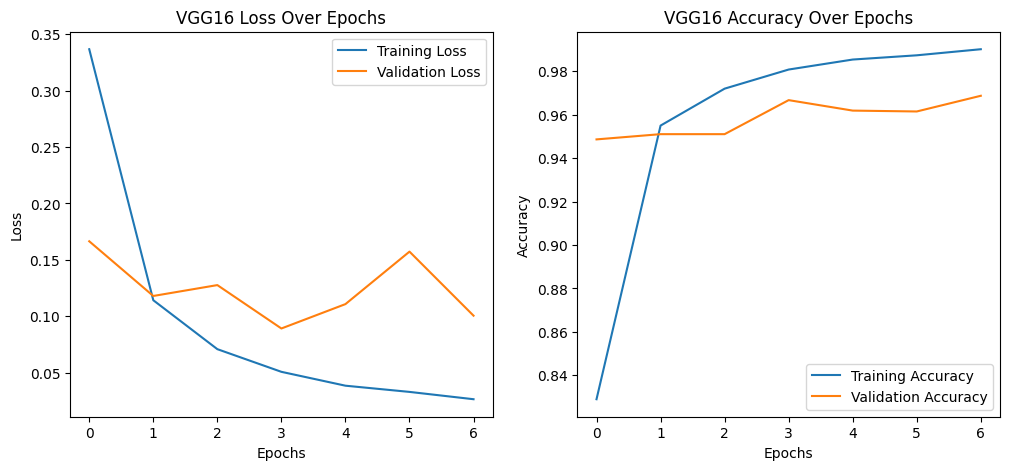

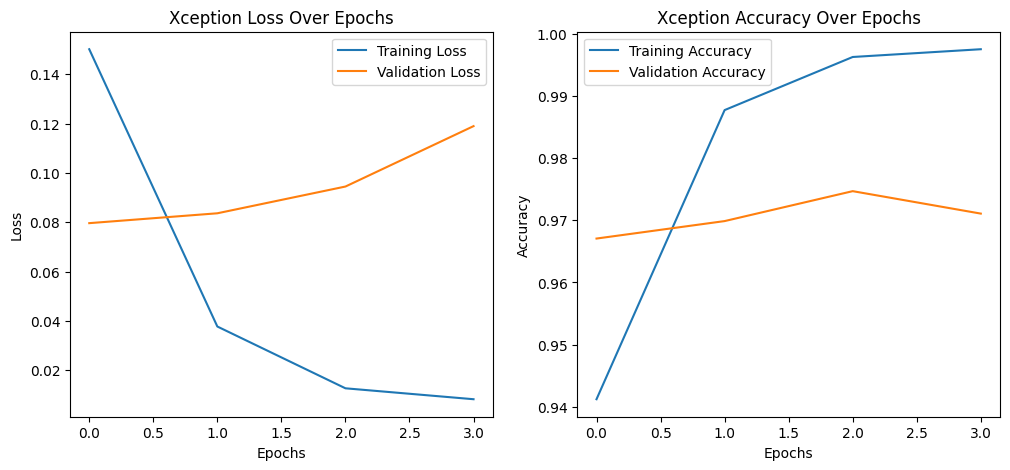

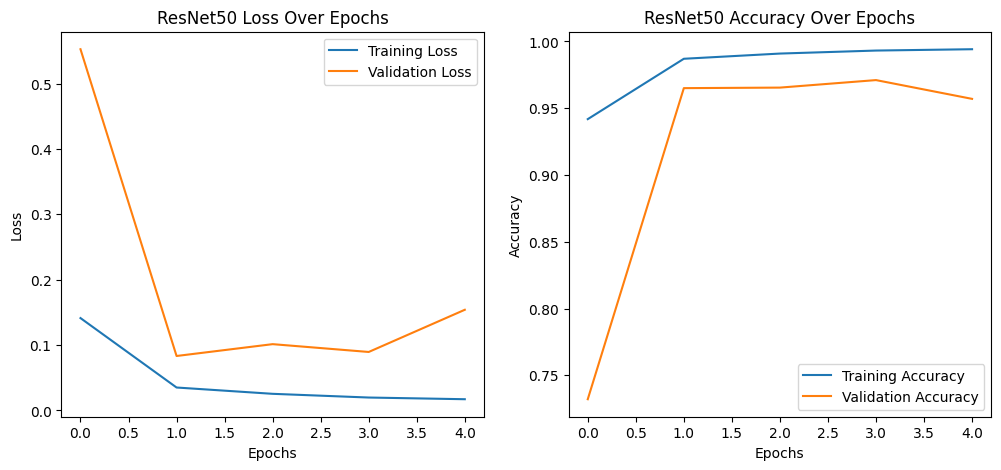

79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 561ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 445ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 378ms/step
Ensemble Test Accuracy: 0.9732


In [ ]:

# Plot the graphs for each model
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy Over Epochs')
    plt.legend()

    plt.show()

plot_history(history_vgg16, "VGG16")
plot_history(history_xception, "Xception")
plot_history(history_resnet50, "ResNet50")

# Ensembling: Average predictions from the three models
def ensemble_predict(X):
    vgg16_preds = vgg16_model.predict(X)
    xception_preds = xception_model.predict(X)
    resnet50_preds = resnet50_model.predict(X)
    avg_preds = (vgg16_preds + xception_preds + resnet50_preds) / 3
    return (avg_preds > 0.5).astype(int)

# Check on the test data
ensemble_preds = ensemble_predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble Test Accuracy: {ensemble_accuracy}")

Accuracy of our ensemble reached 0.9732